In [1]:
# Loading required libraries
library(tidyverse)
library(dplyr)
library(corrplot)
library(ggplot2)
library(e1071)
library(GGally)
library(glmnet)
library(caret)
library(randomForest)
library(gridExtra)
library(reshape2)
# Suppressing warnings for cleaner output
options(warn = -1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.

In [2]:
# Loading the datasets (red and white wine quality data)
df1 <- read.csv('winequality-red.csv', sep = ';')
df2 <- read.csv('winequality-white.csv', sep = ';')

In [3]:
str(df1)

'data.frame':	1599 obs. of  12 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


In [4]:
summary(df1)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [5]:
dim(df1)

[1] 1599   12

In [6]:
str(df2)

'data.frame':	4898 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...


In [7]:
summary(df2)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 5.200  
 Mean   : 6.855   Mean   :0.2782   Mean   :0.3342   Mean   : 6.391  
 3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900   3rd Qu.: 9.900  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0        1st Qu.:0.9917  
 Median :0.04300   Median : 34.00      Median :134.0        Median :0.9937  
 Mean   :0.04577   Mean   : 35.31      Mean   :138.4        Mean   :0.9940  
 3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0        3rd Qu.:0.9961  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

In [8]:
dim(df2)

[1] 4898   12

In [9]:
# Adding a column to indicate wine type
df1$type <- 'red'
df2$type <- 'white'

In [10]:
# Combining both datasets into one
combined_df <- bind_rows(df1, df2)

In [11]:
dim(combined_df)

[1] 6497   13

In [12]:
str(combined_df)

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ type                : chr  "red" "red" "red" "red" ...


In [13]:
head(combined_df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


In [14]:
# Checking for missing values
sum(is.na(combined_df))

[1] 0

In [15]:
summary(combined_df)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500   1st Qu.: 1.800  
 Median : 7.000   Median :0.2900   Median :0.3100   Median : 3.000  
 Mean   : 7.215   Mean   :0.3397   Mean   :0.3186   Mean   : 5.443  
 3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900   3rd Qu.: 8.100  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0        1st Qu.:0.9923  
 Median :0.04700   Median : 29.00      Median :118.0        Median :0.9949  
 Mean   :0.05603   Mean   : 30.53      Mean   :115.7        Mean   :0.9947  
 3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0        3rd Qu.:0.9970  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

In [16]:
# Identifying duplicate rows (summarizing)
duplicates_summary <- combined_df %>%
  group_by(across(everything())) %>%
  summarise(count = n(), .groups = 'drop') %>%
  filter(count > 1)
# Printing duplicate summary if any duplicates exist
if (nrow(duplicates_summary) > 0) {
  cat("Summary of duplicate rows:\n")
  print(duplicates_summary)
} else {
  cat("No duplicate rows found.\n")
}

Summary of duplicate rows:
# A tibble: 992 × 14
   fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
           <dbl>            <dbl>       <dbl>          <dbl>     <dbl>
 1           4.9            0.335        0.14            1.3     0.036
 2           4.9            0.345        0.34            1       0.068
 3           5              0.27         0.32            4.5     0.032
 4           5              0.33         0.16            1.5     0.049
 5           5              0.35         0.25            7.8     0.031
 6           5.1            0.29         0.28            8.3     0.026
 7           5.1            0.33         0.22            1.6     0.027
 8           5.1            0.35         0.26            6.8     0.034
 9           5.2            0.155        0.33            1.6     0.028
10           5.2            0.24         0.45            3.8     0.027
# ℹ 982 more rows
# ℹ 9 more variables: free.sulfur.dioxide <dbl>, total.sulfur.dioxide <dbl>,
#   d

In [17]:
# Removing duplicate rows
combined_df <- combined_df %>%
  distinct(across(everything()), .keep_all = TRUE)

In [18]:
head(combined_df)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,red


In [19]:
dim(combined_df)

[1] 5320   13

In [20]:
summary(combined_df)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2400   1st Qu.: 1.800  
 Median : 7.000   Median :0.3000   Median :0.3100   Median : 2.700  
 Mean   : 7.215   Mean   :0.3441   Mean   :0.3185   Mean   : 5.048  
 3rd Qu.: 7.700   3rd Qu.:0.4100   3rd Qu.:0.4000   3rd Qu.: 7.500  
 Max.   :15.900   Max.   :1.5800   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  1.00      Min.   :  6.0        Min.   :0.9871  
 1st Qu.:0.03800   1st Qu.: 16.00      1st Qu.: 74.0        1st Qu.:0.9922  
 Median :0.04700   Median : 28.00      Median :116.0        Median :0.9947  
 Mean   :0.05669   Mean   : 30.04      Mean   :114.1        Mean   :0.9945  
 3rd Qu.:0.06600   3rd Qu.: 41.00      3rd Qu.:153.2        3rd Qu.:0.9968  
 Max.   :0.61100   Max.   :289.00      Max.   :440.0   

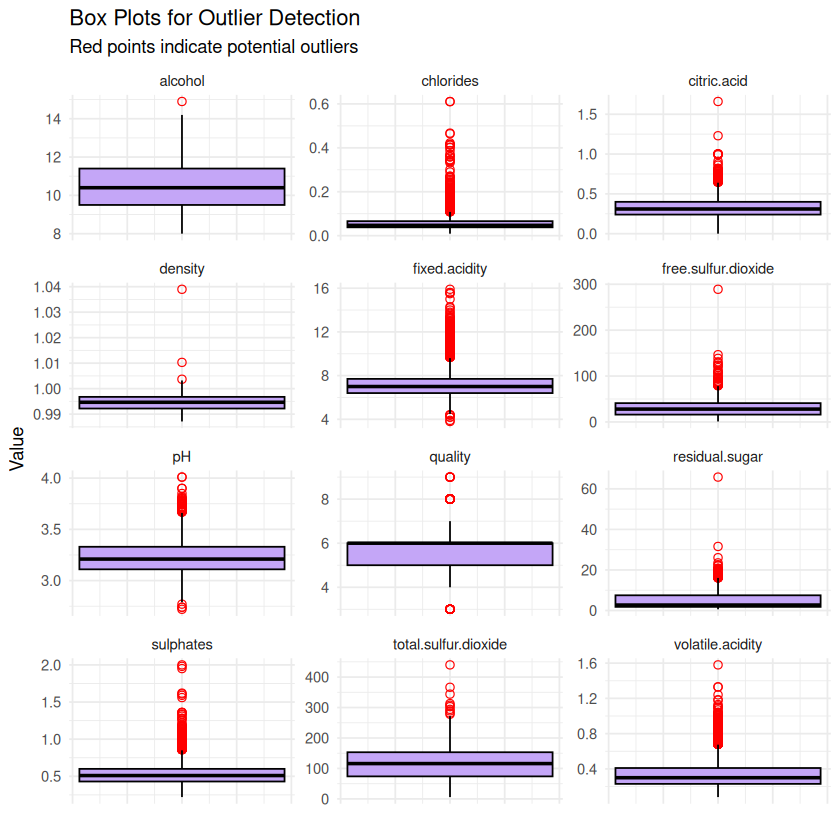

In [21]:
# Creating box plots to visualize potential outliers
combined_df %>%
  select(-type) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
  ggplot(aes(y = value)) +
  geom_boxplot(fill = "#c4a6f7", color = "black", outlier.color = "red", outlier.shape = 1, outlier.size = 2) +
  facet_wrap(~ variable, scales = "free", ncol = 3) +
  labs(title = "Box Plots for Outlier Detection",
       subtitle = "Red points indicate potential outliers",
       x = "",
       y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_blank())

In [22]:
# Function to detect outliers using the IQR method
detect_outliers_iqr <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR
  return(x < lower_bound | x > upper_bound)
}
# Summarize the number of outliers per variable
outlier_summary <- combined_df %>%
  select(-type) %>%
  summarise(across(everything(), ~ sum(detect_outliers_iqr(.)))) %>%
  pivot_longer(everything(), names_to = "variable", values_to = "outlier_count")
# Printing the outlier summary
print(outlier_summary)

# A tibble: 12 × 2
   variable             outlier_count
   <chr>                        <int>
 1 fixed.acidity                  304
 2 volatile.acidity               279
 3 citric.acid                    143
 4 residual.sugar                 141
 5 chlorides                      237
 6 free.sulfur.dioxide             44
 7 total.sulfur.dioxide            10
 8 density                          3
 9 pH                              49
10 sulphates                      163
11 alcohol                          1
12 quality                        183


In [23]:
# Removing outliers by replacing them with NA and dropping them
combined_df_no_outliers <- combined_df %>%
  mutate(across(where(is.numeric), ~ ifelse(detect_outliers_iqr(.), NA, .))) %>%
  drop_na() 

In [24]:
# Checking if any missing values remain after removing outliers
sum(is.na(combined_df_no_outliers))

[1] 0

In [25]:
dim(combined_df_no_outliers)

[1] 4081   13

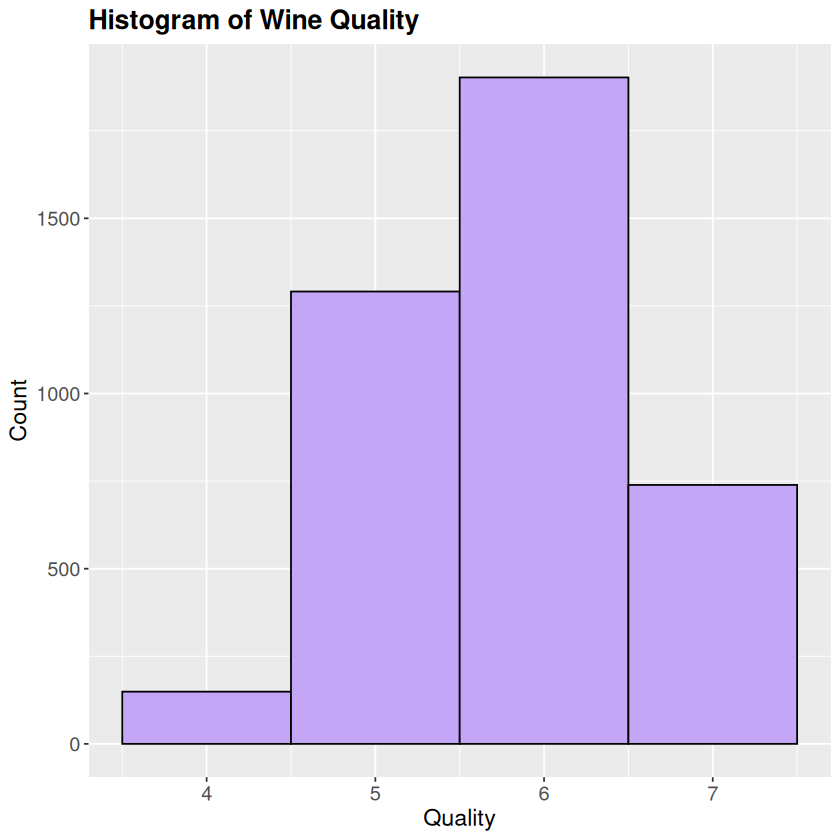

In [26]:
# Creating the histogram of wine quality
p <- ggplot(combined_df_no_outliers, aes(x = quality)) +
  geom_histogram(binwidth = 1, fill = '#c4a6f7', color = 'black') +
  labs(title = "Histogram of Wine Quality", x = "Quality", y = "Count") +
  theme(
    plot.title = element_text(size = 16, face = "bold"), 
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    axis.text = element_text(size = 12)
  )
print(p)


In [27]:
# Computing correlation matrix (excluding wine type)
cor_matrix <- cor(combined_df_no_outliers %>% dplyr::select(-type))
print(cor_matrix["quality", ])

       fixed.acidity     volatile.acidity          citric.acid 
         -0.09418629          -0.23055192           0.10214977 
      residual.sugar            chlorides  free.sulfur.dioxide 
         -0.05604231          -0.26174430           0.07474544 
total.sulfur.dioxide              density                   pH 
         -0.06840644          -0.33324379           0.05287145 
           sulphates              alcohol              quality 
          0.05906930           0.45387168           1.00000000 


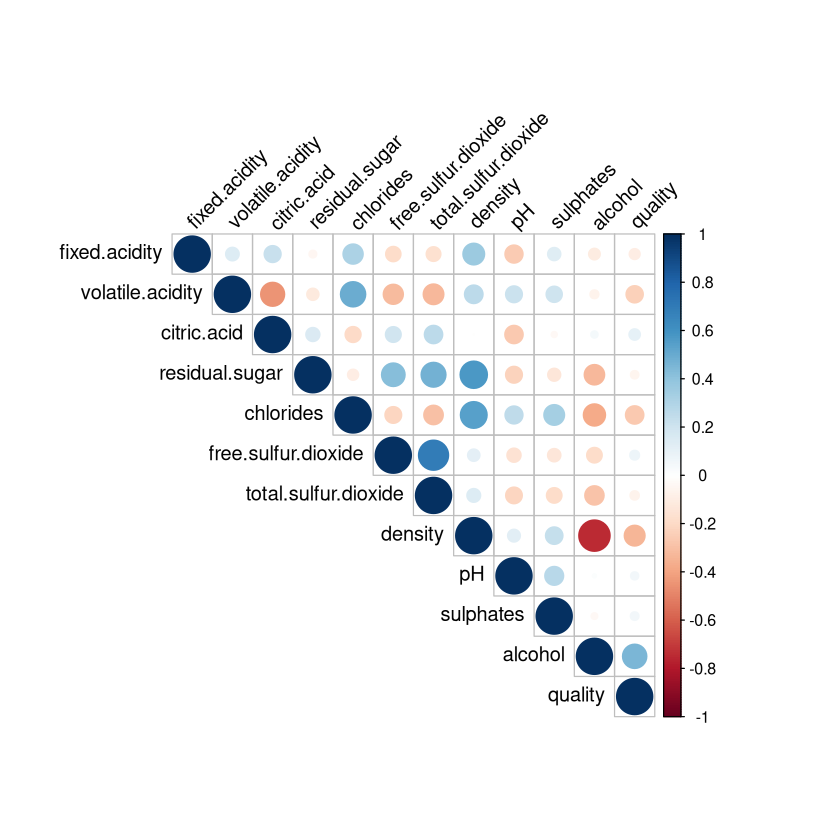

In [28]:
# Visualizing correlation matrix 
corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black", tl.srt = 45)

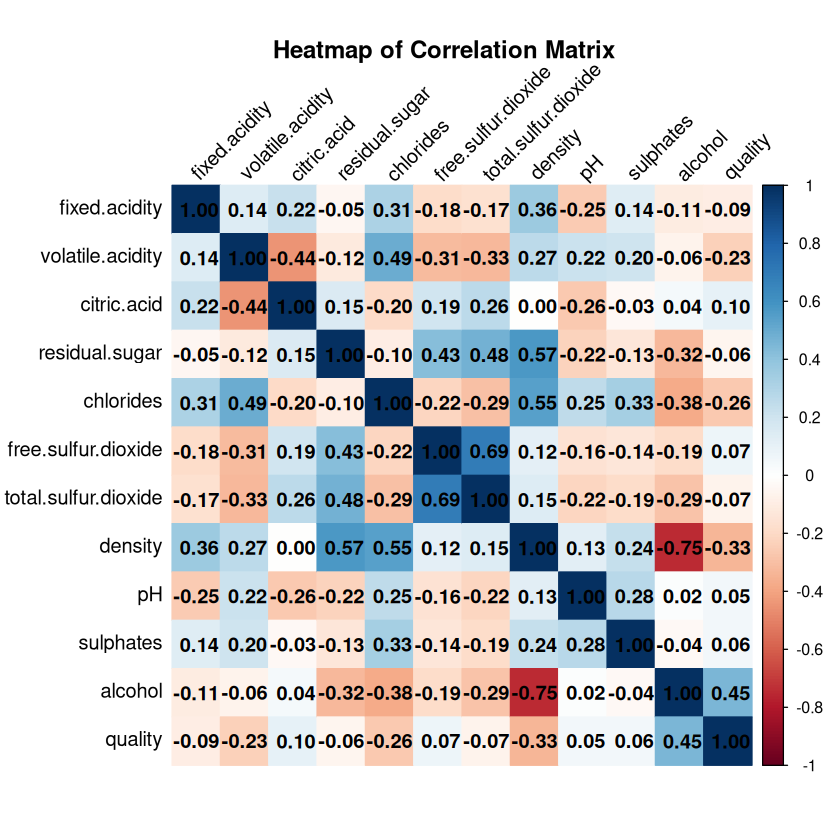

In [29]:
# Visualizing correlation matrix 
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.col = "black", tl.srt = 45)
title("Heatmap of Correlation Matrix")

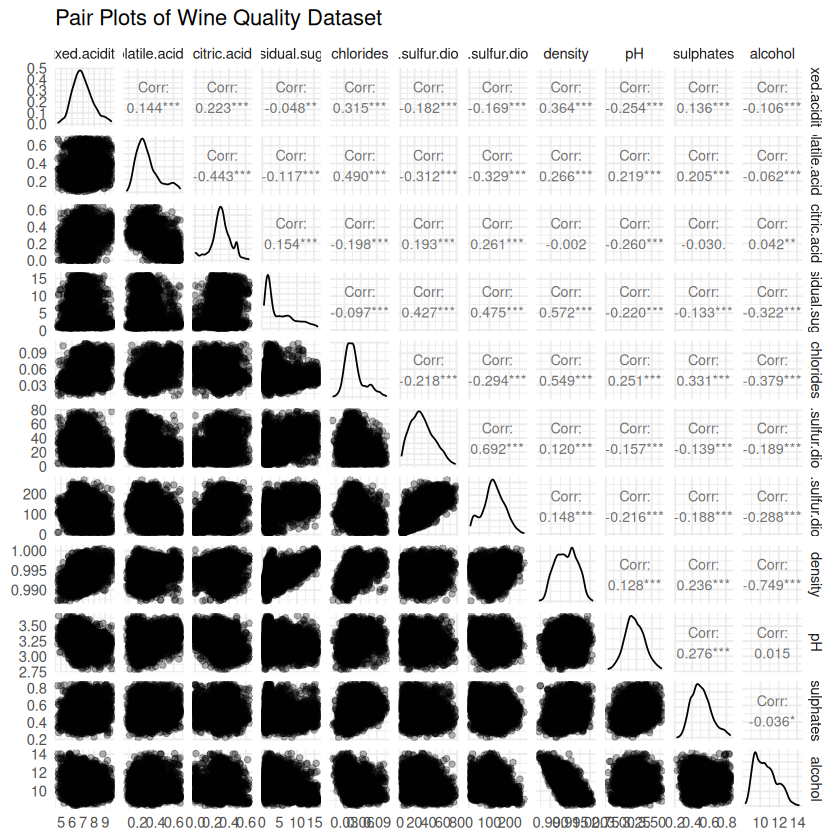

In [30]:
# Pair plots for exploring feature relationships
ggpairs(combined_df_no_outliers, columns = 1:11,
        title = "Pair Plots of Wine Quality Dataset",
        lower = list(continuous = wrap("points", alpha = 0.3)),
        diag = list(continuous = wrap("densityDiag")),
        upper = list(continuous = wrap("cor", size = 3))) +
  theme_minimal()

In [31]:
# Converting dataset to model matrix (automatically handles categorical variables)
# The first column (intercept) is removed
X <- model.matrix(quality ~ ., data = combined_df_no_outliers)[, -1]  
Y <- combined_df_no_outliers$quality  # Response variable (wine quality)

# Splitting data into training and testing sets
# Setting seed for reproducibility and split data into training and testing sets (75% train, 25% test)
set.seed(123)
trainIndex <- createDataPartition(Y, p = 0.75, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
Y_train <- Y[trainIndex]
Y_test <- Y[-trainIndex]

# Scaling data using training set parameters
scaler <- preProcess(X_train, method = c("center", "scale"))
x_train_scaled <- predict(scaler, X_train)
x_test_scaled <- predict(scaler, X_test)

# Defining cross-validation settings for model tuning
fit_control <- trainControl(method = "cv", number = 10)

# Creating a tuning grid for Elastic Net
elastic_grid <- expand.grid(
  alpha = seq(0, 1, by = 0.1),  # Mixing parameter
  lambda = 10^seq(-3, 0, length = 20)  # Regularization strength
)

# Training model
elastic_model <- train(
  x = x_train_scaled,
  y = Y_train,
  method = "glmnet",
  trControl = fit_control,
  tuneGrid = elastic_grid
)

# Extracting the best tuning parameters
best_alpha <- elastic_model$bestTune$alpha
best_lambda <- elastic_model$bestTune$lambda

# Making predictions
predictions <- predict(elastic_model, x_test_scaled)

# Calculating performance metrics
r_squared <- cor(Y_test, predictions)^2
mse_en <- mean((Y_test - predictions)^2)
rmse_en <- sqrt(mse_en)
mae_en<- mean(abs(Y_test -predictions))
r2_en<- cor(Y_test, predictions)^2

# Computing accuracy (within ±0.5 of actual value)
accuracy_en <- mean(abs(Y_test - predictions) <= 0.5) * 100

# Printing results
cat('Best Alpha:',best_alpha,'\n')
cat('Best Lambda:',best_lambda,'\n')
cat("Elastic Net R-squared:", round(r2_en, 4), "\n")
cat("Elastic Net MSE:", round(mse_en, 4), "\n")
cat("Elastic Net RMSE:", round(rmse_en, 4), "\n")
cat("Elastic Net MAE:", round(mae_en, 4), "\n")
cat("Elastic Net Accuracy (±0.5 range):", round(accuracy_en, 2), "%\n")


Best Alpha: 0.1 
Best Lambda: 0.00143845 
Elastic Net R-squared: 0.2811 
Elastic Net MSE: 0.4381 
Elastic Net RMSE: 0.6619 
Elastic Net MAE: 0.528 
Elastic Net Accuracy (±0.5 range): 54.96 %


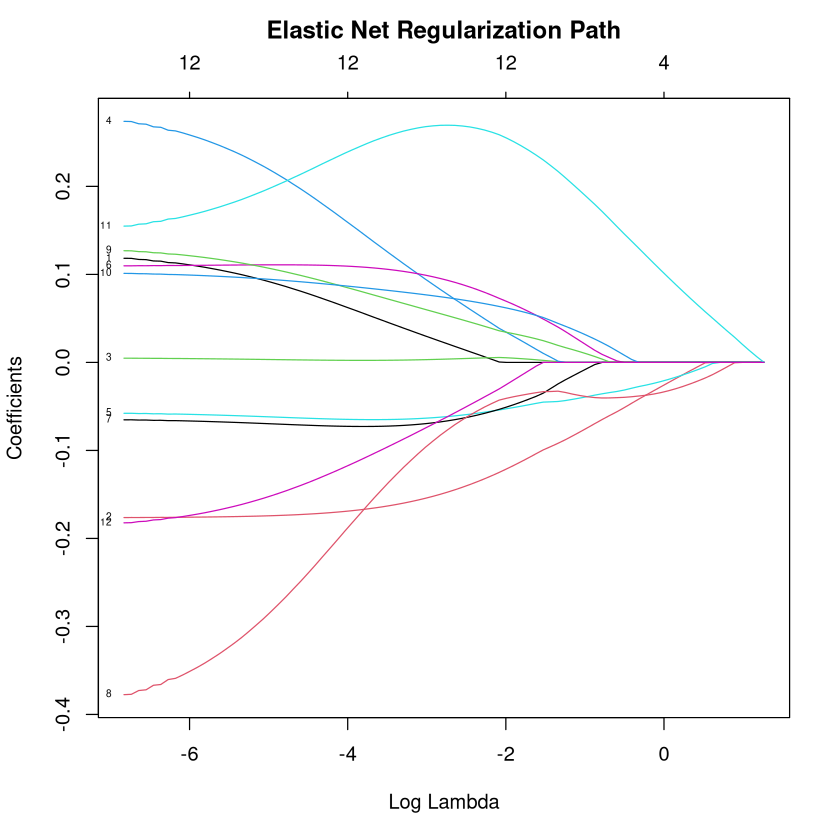

In [32]:
# Plotting regularization path
plot(elastic_model$finalModel, xvar = "lambda", label = TRUE)
title("Elastic Net Regularization Path", line = 2.5)


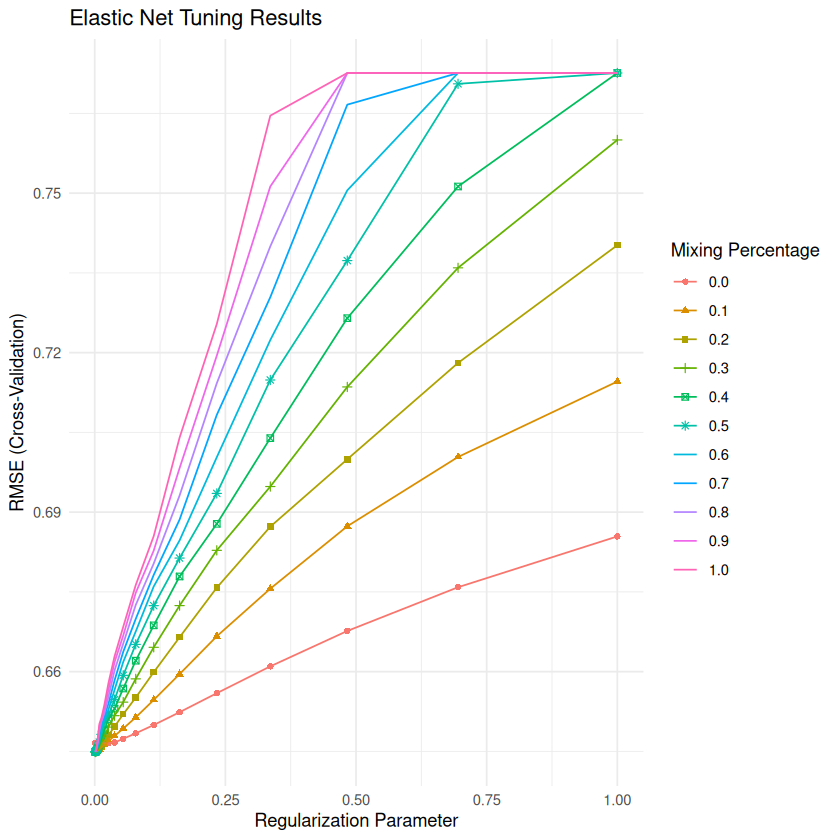

In [33]:
# Plotting cross-validation results
ggplot(elastic_model) + 
  theme_minimal() +
  ggtitle("Elastic Net Tuning Results")

In [34]:
# Setting seed for reproducibility
set.seed(123)

# Ensuring `quality` is numeric (important for regression)
combined_df_no_outliers$quality <- as.numeric(as.character(combined_df_no_outliers$quality))

# Prepare the data (converting to model matrix to handle categorical variables)
X <- model.matrix(quality ~ ., data = combined_df_no_outliers)[, -1]  # to remove intercept
Y <- combined_df_no_outliers$quality  # Numeric response variable

# Splitting data into training and testing sets
trainIndex <- createDataPartition(Y, p = 0.75, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
Y_train <- Y[trainIndex]
Y_test <- Y[-trainIndex]

# Training a Random Forest model (Regression)
rf_model <- randomForest(X_train, Y_train, ntree = 500)

# Making predictions
rf_pred <- predict(rf_model, X_test)

# Calculating evaluation metrics
mse_rf <- mean((Y_test - rf_pred)^2)
rmse_rf <- sqrt(mse_rf)
mae_rf <- mean(abs(Y_test - rf_pred))
r2_rf <- cor(Y_test, rf_pred)^2

# Calculating Accuracy (Percentage of predictions within ±0.5 of actual value)
accuracy_rf <- mean(abs(Y_test - rf_pred) <= 0.5) * 100

# Printing the results
cat("Random Forest R-squared:", round(r2_rf, 4), "\n")
cat("Random Forest MSE:", round(mse_rf, 4), "\n")
cat("Random Forest RMSE:", round(rmse_rf, 4), "\n")
cat("Random Forest MAE:", round(mae_rf, 4), "\n")
cat("Random Forest Accuracy (±0.5 range):", round(accuracy_rf, 2), "%\n")


Random Forest R-squared: 0.3872 
Random Forest MSE: 0.3766 
Random Forest RMSE: 0.6137 
Random Forest MAE: 0.4882 
Random Forest Accuracy (±0.5 range): 59.47 %


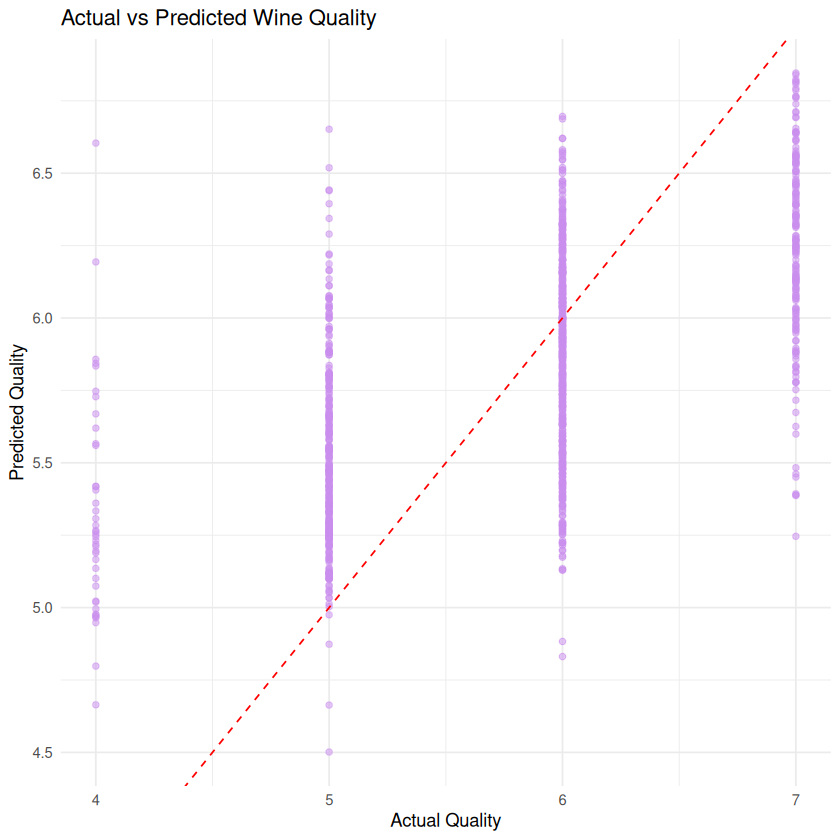

In [35]:
# Scatter plot: Predicted vs Actual values
ggplot(data = data.frame(actual = Y_test, predicted = rf_pred), aes(x = actual, y = predicted)) +
  geom_point(color = '#c98eed', alpha = 0.5) +
  geom_abline(slope = 1, intercept = 0, color = 'red', linetype = "dashed") +
  labs(title = "Actual vs Predicted Wine Quality", x = "Actual Quality", y = "Predicted Quality") +
  theme_minimal()

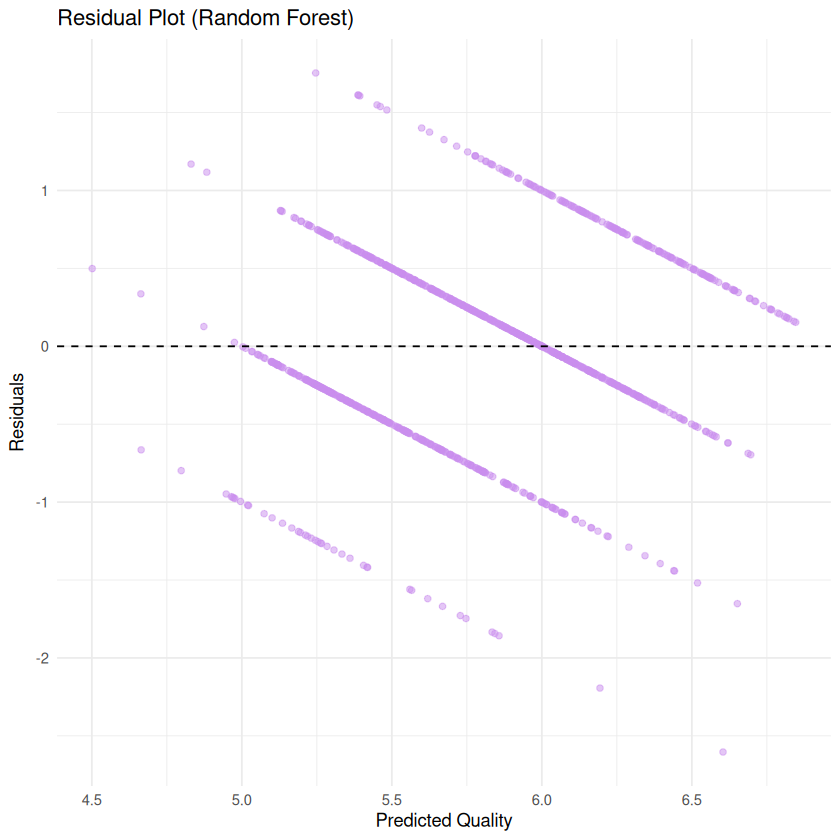

In [36]:
# Residual plot to check model errors
ggplot(data = data.frame(residuals = Y_test - rf_pred, predicted = rf_pred), aes(x = predicted, y = residuals)) +
  geom_point(color = '#c98eed', alpha = 0.5) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Residual Plot (Random Forest)", x = "Predicted Quality", y = "Residuals") +
  theme_minimal()

In [37]:
# Storing results in a data frame
model_comparison <- data.frame(
  Model = c("Elastic Net", "Random Forest"),
  R2 = c(r2_en, r2_rf),
  MSE = c(mse_en, mse_rf),
  RMSE = c(rmse_en, rmse_rf),
  MAE = c(mae_en, mae_rf),
  Accuracy = c(accuracy_en, accuracy_rf)
)

# Print comparison table
print(model_comparison)

          Model        R2       MSE      RMSE       MAE Accuracy
1   Elastic Net 0.2810793 0.4381163 0.6619035 0.5279661 54.95584
2 Random Forest 0.3871722 0.3765960 0.6136742 0.4882096 59.47007


In [38]:
color_palette <- c("#4eaff5", "#fa5faf", "#c98eed")  

In [39]:
comparison_melted <- melt(model_comparison, id.vars = "Model")

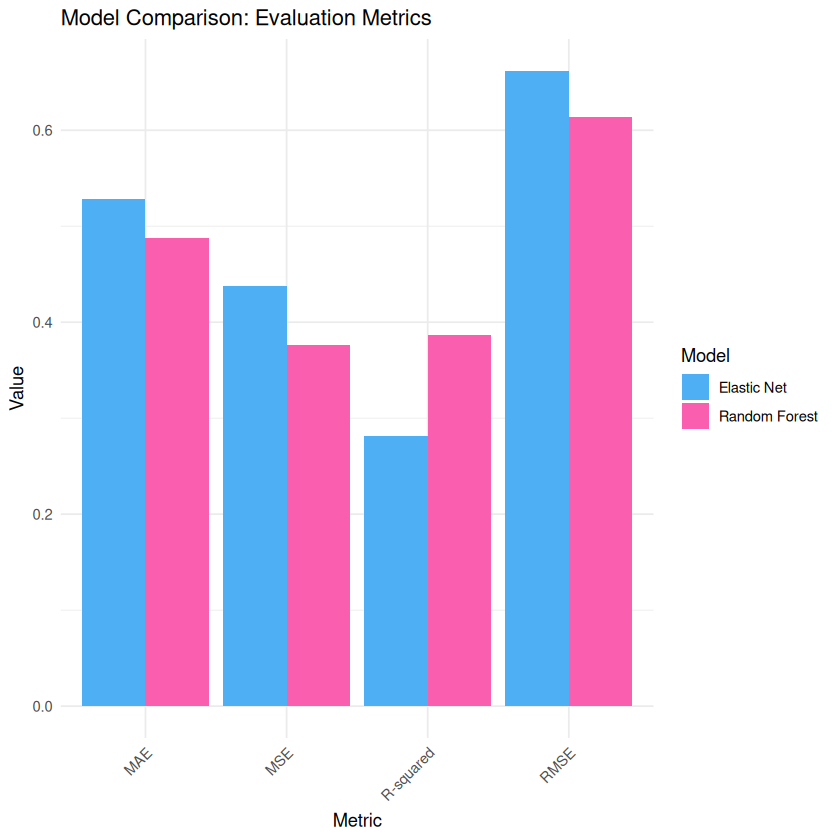

In [40]:
#  Bar plot for comparison of metrics
metrics <- data.frame(
  Model = rep(c("Elastic Net", "Random Forest"), each = 4),
  Metric = rep(c("R-squared", "MSE", "RMSE", "MAE"), 2),
  Value = c(r2_en, mse_en, rmse_en, mae_en, r2_rf, mse_rf, rmse_rf, mae_rf)
)
ggplot(metrics, aes(x = Metric, y = Value, fill = Model)) +

  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = color_palette) +  # Apply custom colors
  labs(title = "Model Comparison: Evaluation Metrics", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

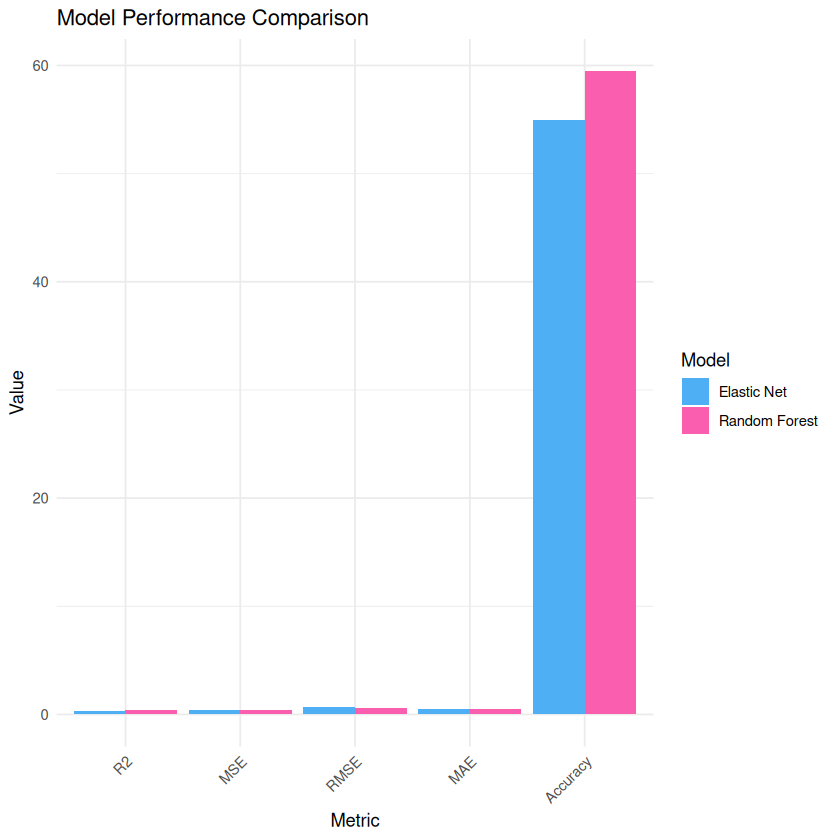

In [41]:
# Bar plot to compare model performance
ggplot(comparison_melted, aes(x = variable, y = value, fill = Model)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_manual(values = color_palette) +
  labs(title = "Model Performance Comparison", x = "Metric", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

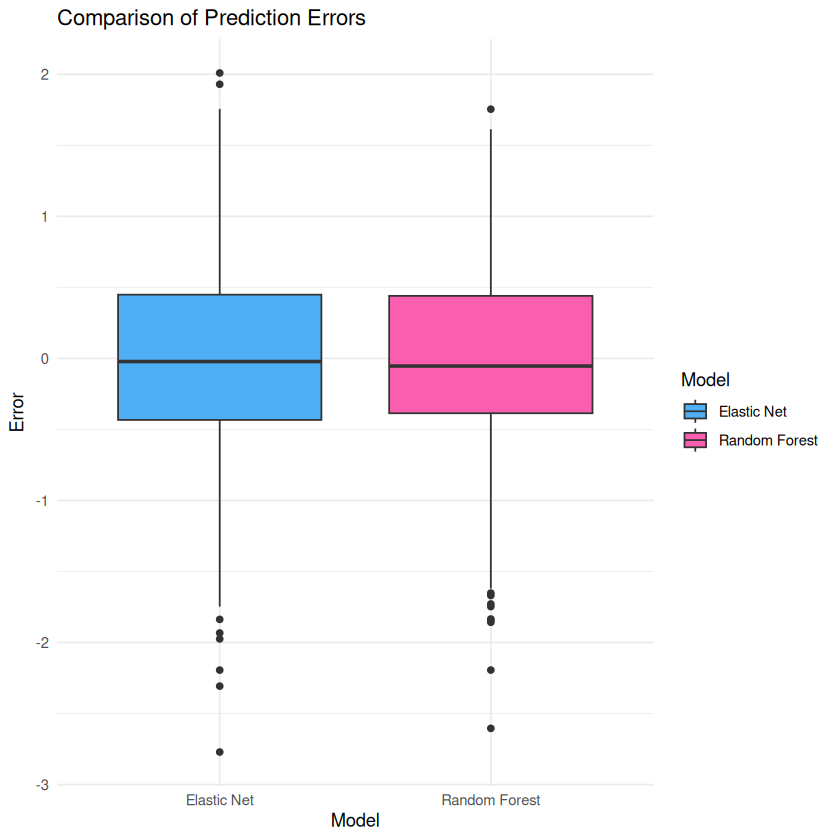

In [42]:
# Boxplot - Prediction Errors Comparison
error_df <- data.frame(
  Model = rep(c("Elastic Net", "Random Forest"), each = length(Y_test)),
  Error = c(Y_test - predictions, Y_test - rf_pred)
)

ggplot(error_df, aes(x = Model, y = Error, fill = Model)) +
  geom_boxplot() +
  scale_fill_manual(values = color_palette) + 
  labs(title = "Comparison of Prediction Errors", y = "Error", x = "Model") +
  theme_minimal()

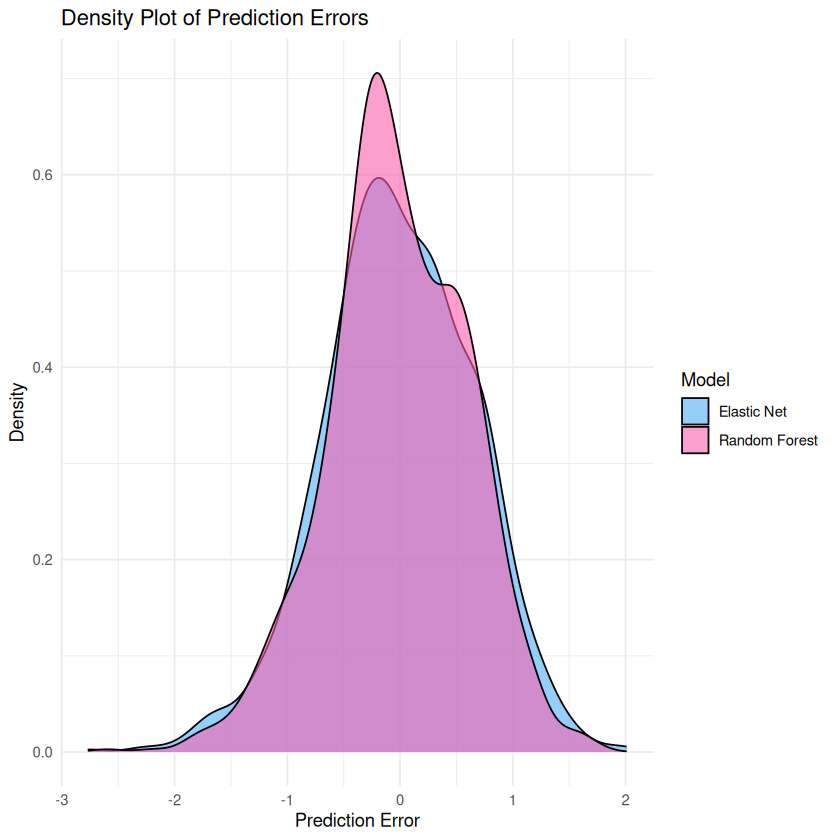

In [43]:
# Density Plot - Distribution of Prediction Errors
ggplot(error_df, aes(x = Error, fill = Model)) +
  geom_density(alpha = 0.6) +
  scale_fill_manual(values = color_palette) + 
  labs(title = "Density Plot of Prediction Errors", x = "Prediction Error", y = "Density") +
  theme_minimal()

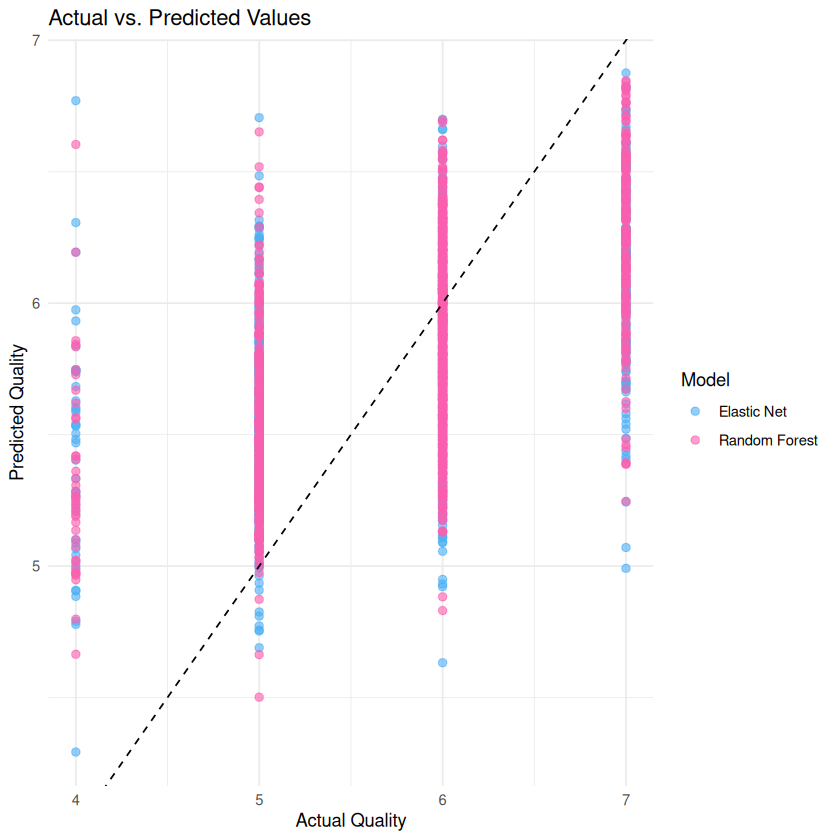

In [44]:
# Scatter Plot - Actual vs. Predicted Values
scatter_df <- data.frame(
  Actual = rep(Y_test, 2),
  Predicted = c(predictions, rf_pred),
  Model = rep(c("Elastic Net", "Random Forest"), each = length(Y_test))
)

ggplot(scatter_df, aes(x = Actual, y = Predicted, color = Model)) +
  geom_point(alpha = 0.6, size = 2) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "black") +
  scale_color_manual(values = color_palette) +
  labs(title = "Actual vs. Predicted Values", x = "Actual Quality", y = "Predicted Quality") +
  theme_minimal()

In [45]:
# Elastic Net Feature Importance
elastic_importance <- varImp(elastic_model)
elastic_importance_df <- data.frame(Feature = rownames(elastic_importance$importance), 
                                    Importance = elastic_importance$importance$Overall)

# Sorting by importance in descending order
elastic_importance_df <- elastic_importance_df[order(-elastic_importance_df$Importance), ]

# Printing the top 10 most important features
print(head(elastic_importance_df, 10))


# Random Forest Feature Importance 
rf_importance <- importance(rf_model)
rf_importance_df <- data.frame(Feature = rownames(rf_importance), 
                               Importance = rf_importance[, 1], 
                               row.names = NULL)  # Removes row names


# Sorting by importance in descending order
rf_importance_df <- rf_importance_df[order(-rf_importance_df$Importance), ]

# Printing the top 10 most important features
print(head(rf_importance_df, 10))


                Feature Importance
8               density  100.00000
4        residual.sugar   72.42815
12            typewhite   47.87751
2      volatile.acidity   46.72877
11              alcohol   41.67015
9                    pH   32.95558
1         fixed.acidity   30.51475
6   free.sulfur.dioxide   28.65577
10            sulphates   26.16603
7  total.sulfur.dioxide   16.57155
                Feature Importance
11              alcohol   320.6711
8               density   191.2222
2      volatile.acidity   171.8558
6   free.sulfur.dioxide   162.3187
5             chlorides   153.4435
7  total.sulfur.dioxide   139.0493
10            sulphates   123.5632
3           citric.acid   121.9695
4        residual.sugar   121.3869
9                    pH   115.7259


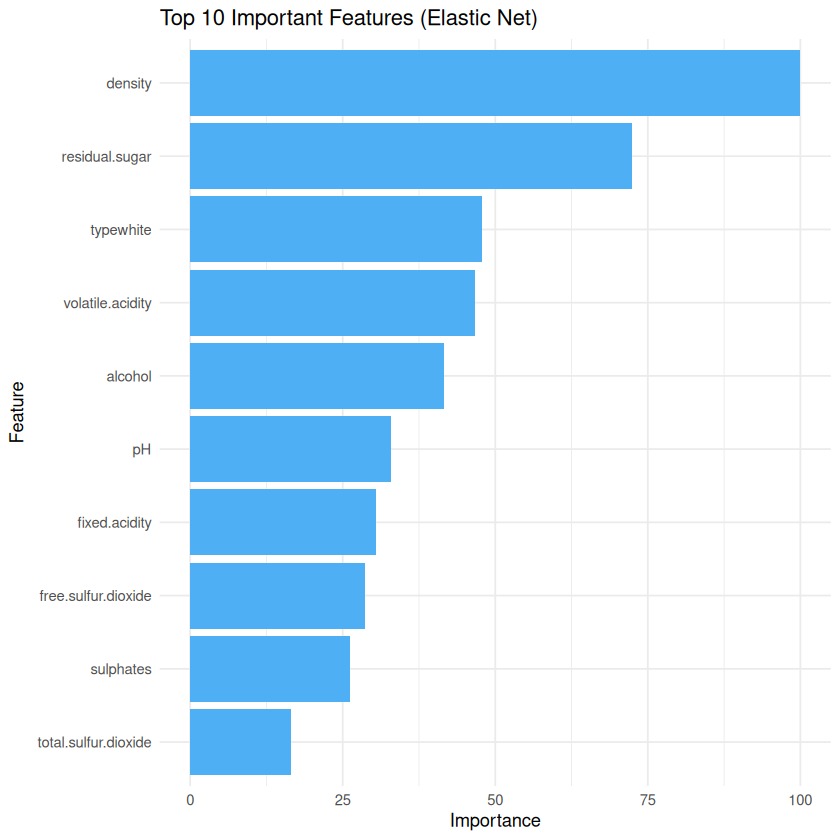

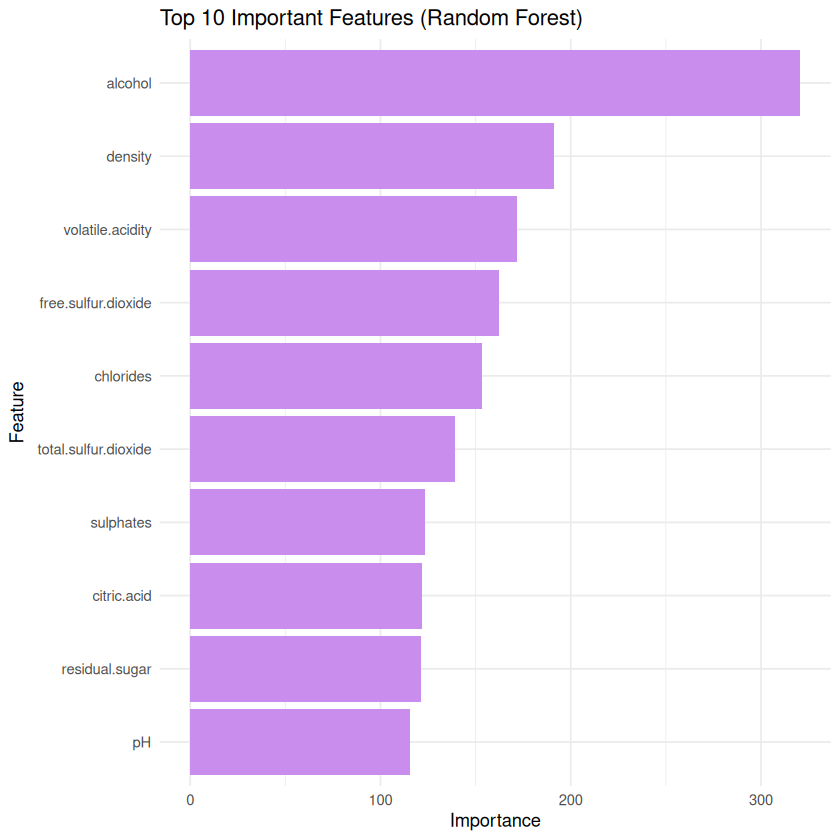

In [46]:
# Elastic Net Feature Importance Plot 
ggplot(elastic_importance_df[1:10, ], aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "#4eaff5") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Top 10 Important Features (Elastic Net)", x = "Feature", y = "Importance")


# Random Forest Feature Importance Plot
ggplot(rf_importance_df[1:10, ], aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "#c98eed") +
  coord_flip() +
  theme_minimal() +
  labs(title = "Top 10 Important Features (Random Forest)", x = "Feature", y = "Importance")
